# **IMPORT DATASET**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/telecom_churn.csv')
df

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0         0           128                1         1       2.70   
1         0           107                1         1       3.70   
2         0           137                1         0       0.00   
3         0            84                0         0       0.00   
4         0            75                0         0       0.00   
...     ...           ...              ...       ...        ...   
3328      0           192                1         1       2.67   
3329      0            68                1         0       0.34   
3330      0            28                1         0       0.00   
3331      0           184                0         0       0.00   
3332      0            74                1         1       3.70   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0                 1    265.1       110           89.0        9.87      10.0  
1                 1    161.6       123           82.0        9.78      13.7  
2                 0    243.4       114           52.0        6.06      12.2  
3                 2    299.4        71           57.0        3.10       6.6  
4                 3    166.7       113           41.0        7.42      10.1  
...             ...      ...       ...            ...         ...       ...  
3328              2    156.2        77           71.7       10.78       9.9  
3329              3    231.1        57           56.4        7.67       9.6  
3330              2    180.8       109           56.0       14.44      14.1  
3331              2    213.8       105           50.0        7.98       5.0  
3332              0    234.4       113          100.0       13.30      13.7  

[3333 rows x 11 columns]

Keterangan Colom:

- Churn - 1 jika pelanggan membatalkan layanan, 0 jika tidak.
- AccountWeeks - Jumlah minggu pelanggan memiliki akun aktif.
- ContractRenewal - 1 jika pelanggan baru saja memperbarui kontrak, 0 jika tidak.
- DataPlan - 1 jika pelanggan memiliki paket data, 0 jika tidak.
- DataUsage - Penggunaan data bulanan dalam gigabyte.
- CustServCalls - Jumlah panggilan ke layanan pelanggan.
- DayMins - Rata-rata menit penggunaan siang hari per bulan.
- DayCalls - Rata-rata jumlah panggilan siang hari per bulan.
- MonthlyCharge - Tagihan bulanan rata-rata.
- OverageFee - Biaya kelebihan penggunaan terbesar dalam 12 bulan terakhir.
- RoamMins - Rata-rata jumlah menit penggunaan roaming.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [4]:
#mengecek missing value pada masing2 kolom

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Persentase'])
missing_data.head(30)

Total  Persentase
Churn                0         0.0
AccountWeeks         0         0.0
ContractRenewal      0         0.0
DataPlan             0         0.0
DataUsage            0         0.0
CustServCalls        0         0.0
DayMins              0         0.0
DayCalls             0         0.0
MonthlyCharge        0         0.0
OverageFee           0         0.0
RoamMins             0         0.0

Tidak ada missing values pada dataset dan type data di masing-masing kolom sudah benar

# **Exploratory Data Analysis**

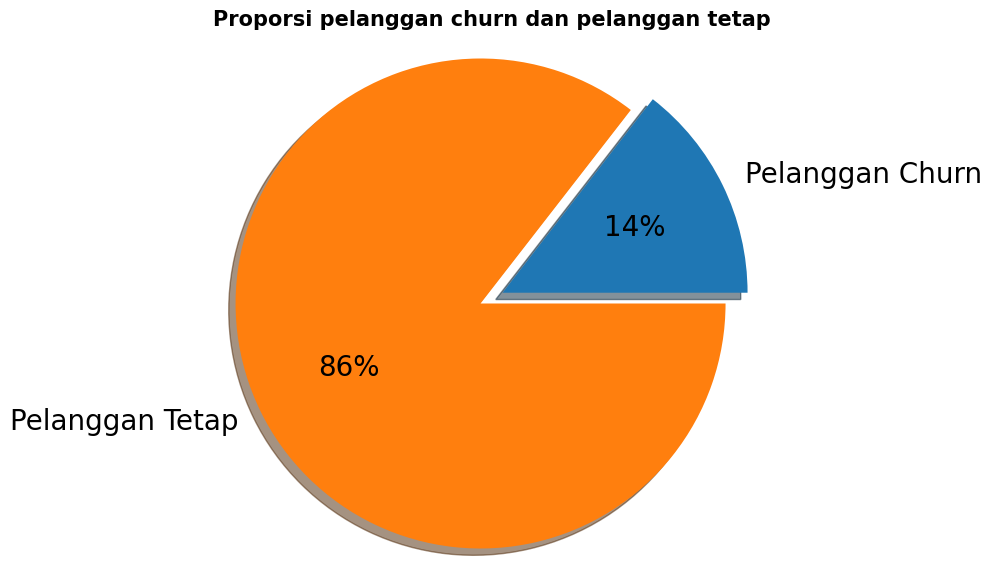

In [5]:
from matplotlib import pyplot as plt
import numpy as np

labels = 'Pelanggan Churn', "Pelanggan Tetap"
sizes = [df.Churn[df['Churn'] == 1].count(), df.Churn[df['Churn'] == 0].count()]
explode = (0.1, 0)

fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%.0f%%', shadow=True, textprops={'fontsize': 20})
ax1.axis('equal')
plt.title("Proporsi pelanggan churn dan pelanggan tetap",
        fontsize = 15,
        family = 'sans-serif',
        fontweight='bold')
#plt.title("Proporsi pelanggan yang churn dan tidak churn")

plt.show()

Dapat dilihat diatas bahwa sebaran data keseluruhan pelanggan yang melakukan churn sebesar 14% dan yang tidak melakukan churn sebesar 86%

In [6]:
def countplot(data, title, title_x, annotate_x, palette):

    fig = plt.figure(figsize = (8, 4))

    ax = fig.add_axes([0, 0, 1, 1])

    sns.countplot(
        y = data,
        palette = palette,
        order = data.value_counts().index,
        edgecolor = 'black',
        lw = 2)

    sns.despine(bottom = True)

    plt.xticks([])
    plt.yticks(
        fontsize = 15,
        color = 'black',
        family = 'sans-serif')

    plt.xlabel('')
    plt.ylabel('')

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate('{:.0f}'.format(width), (annotate_x + width, y + height*0.5), ha='center', fontsize=15, color='black', family='sans-serif')

    plt.title(
        label = title,
        fontsize = 20,
        x = title_x,
        y = 1.1,
        family = 'sans-serif',
        fontweight='bold')

    plt.show()

In [7]:
countplot(
    data=df['Churn'],
    title='Jumlah Kolom Churn',
    title_x=0,
    annotate_x=110,
    palette=['#4869D6', '#FF7373'])

<ipython-input-6-d4c58e959a82>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


In [8]:
sns.pairplot(df, hue="Churn")
plt.show()

RoamMins memiliki hubungan korelasi dengan DataUsage, dikarenakan pengaruh penggunaan layanan Roaming data menyebabkan pelanggan menggunakan data internet yang lebih banyak

**EXPLORATORY DATA ANALYSIS (EDA) DATA TARGET TERHADAP KOLOM KATEGORI**

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(data=df, x='ContractRenewal', hue='Churn')

<Axes: xlabel='ContractRenewal', ylabel='count'>

Pada visualisasi diatas dapat dilihat , perpanjangan kontrak dapat mempengaruhi sebagian kecil pelanggan untuk churn

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(data=df, x='DataPlan', hue='Churn')

<Axes: xlabel='DataPlan', ylabel='count'>

Pelanggan yang tidak menggunakan paket data bercenderung lebih tinggi melakukan churn

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(data=df, x='CustServCalls', hue='Churn')

<Axes: xlabel='CustServCalls', ylabel='count'>

Sebagian besar pelanggan yang melakukan churn adalah pelanggan yang menerima panggilan 1 kali dari customer service

**EXPLORATORY DATA ANALYSIS (EDA) DATA TARGET TERHADAP KOLOM NUMERIC**

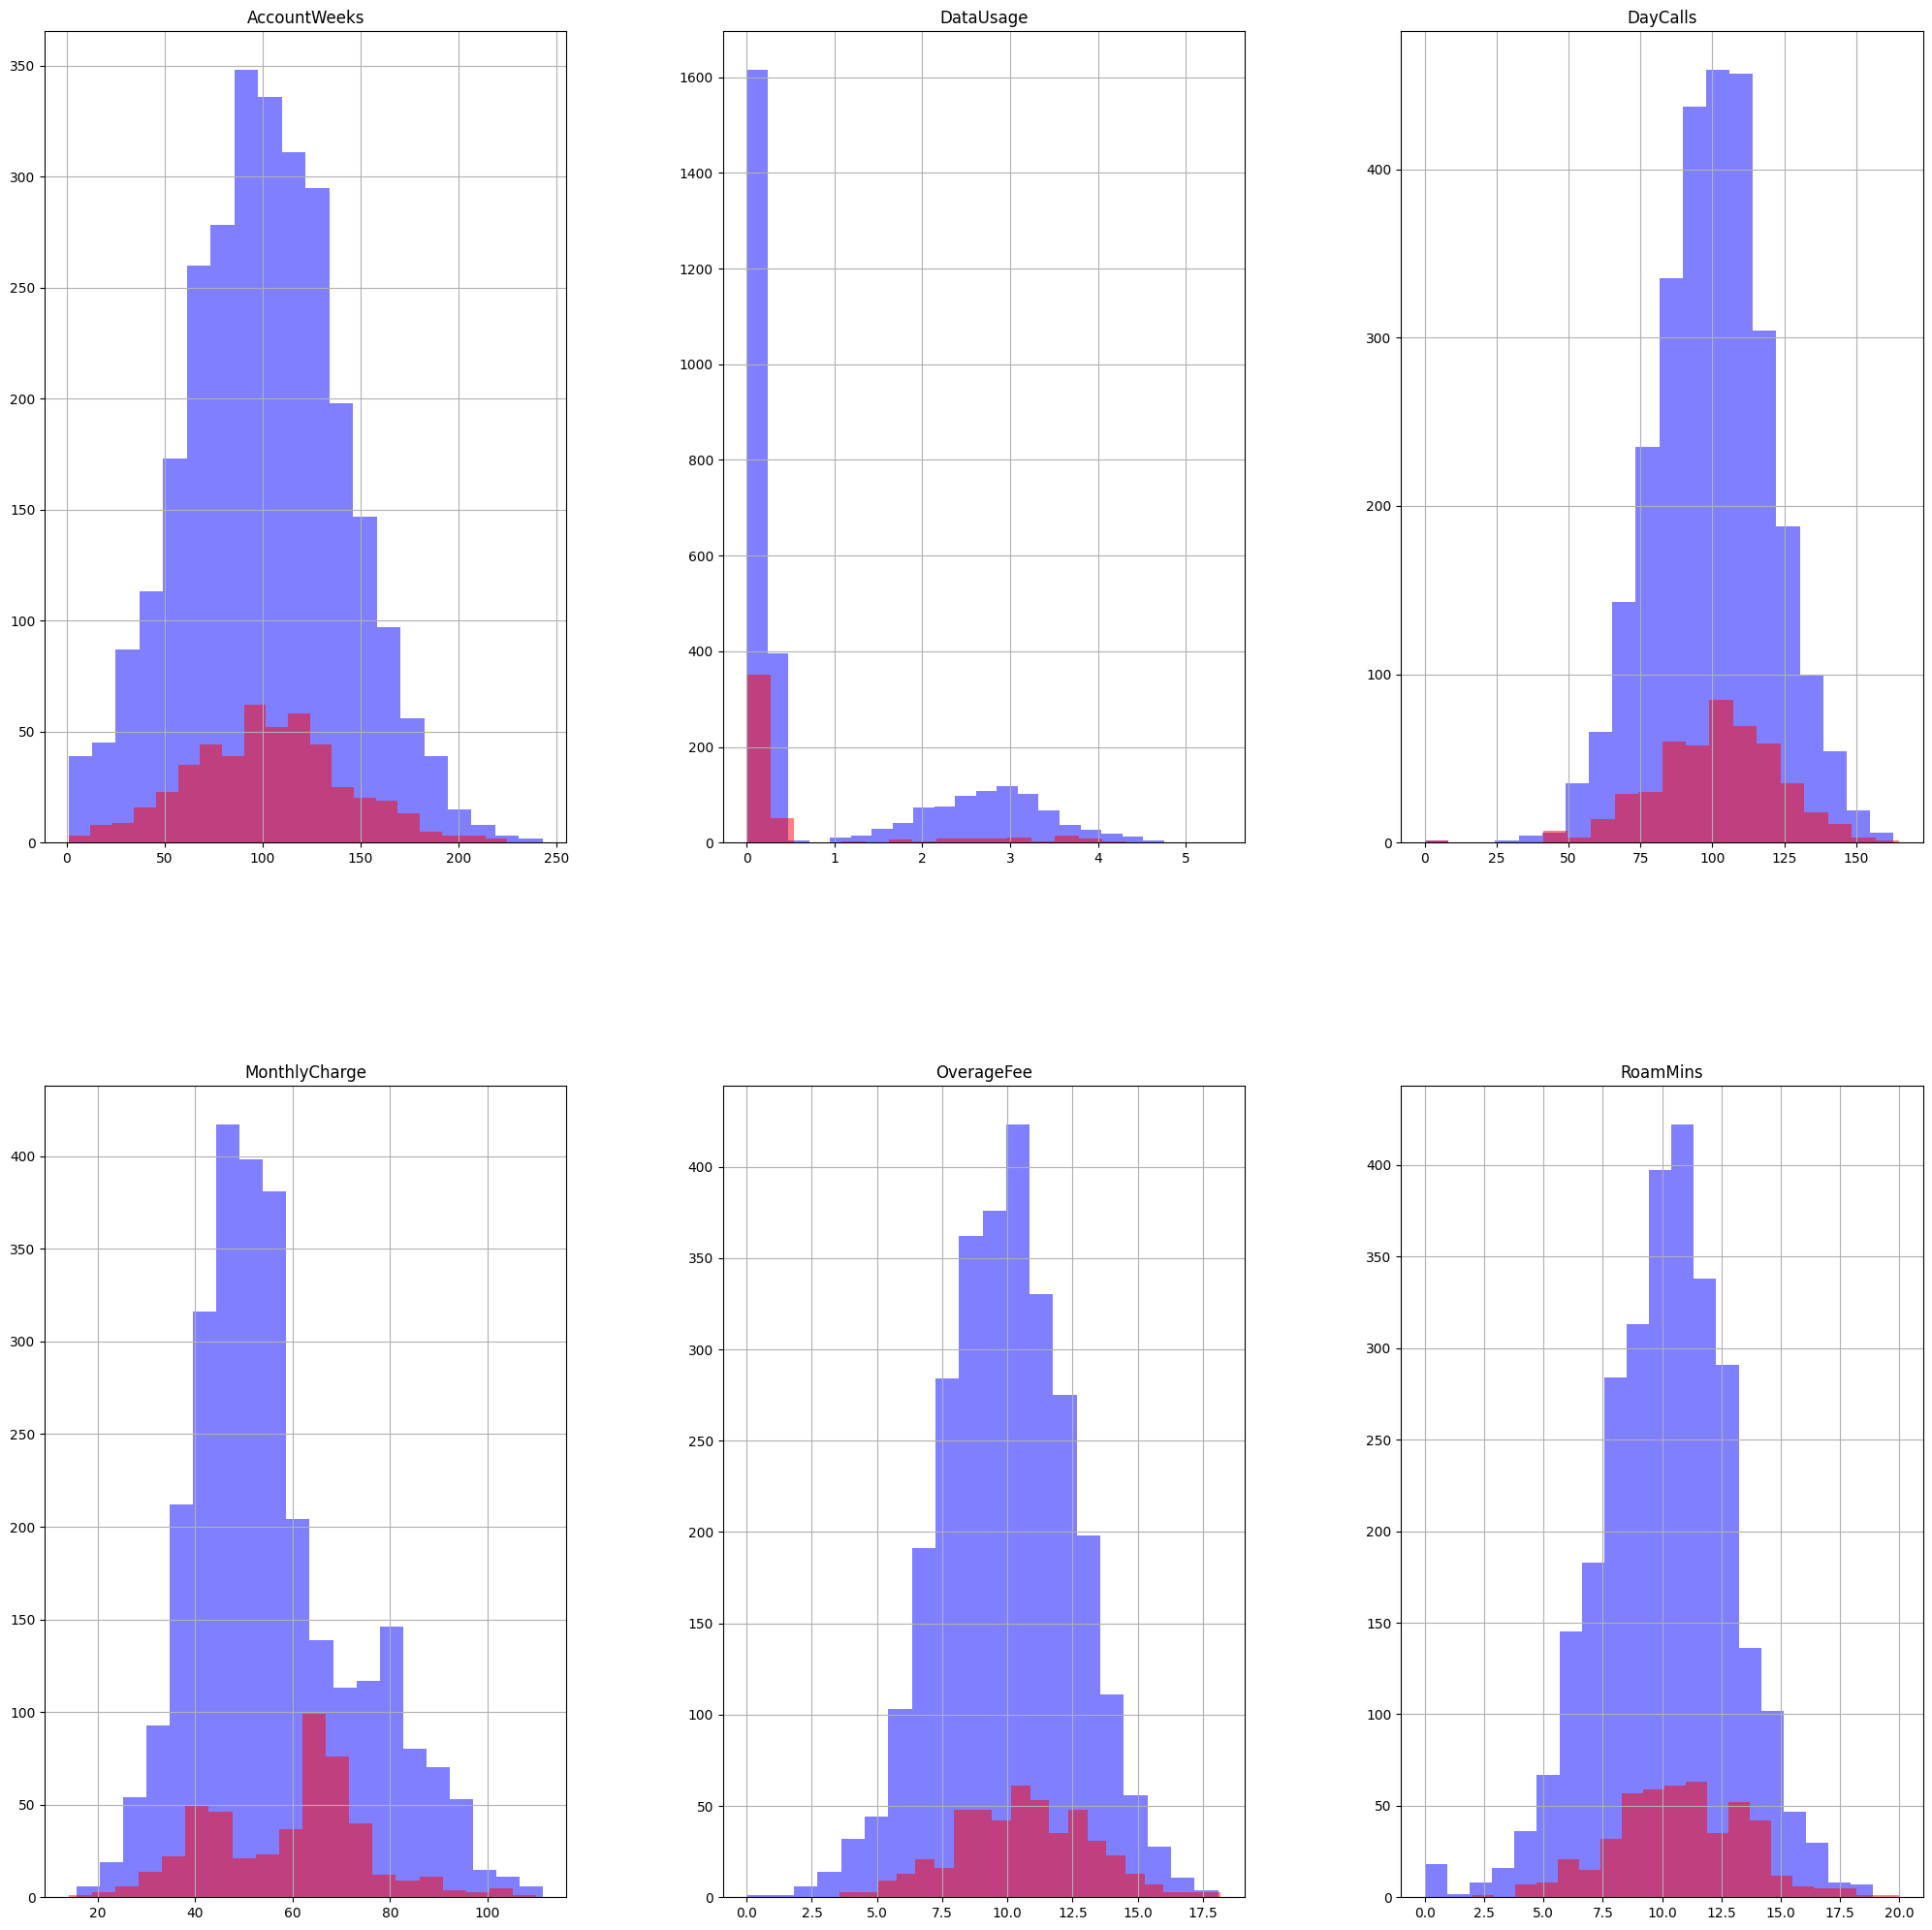

In [12]:
from matplotlib import pyplot as plt
import numpy as np
#creating bin in chart
numerical_features = ['AccountWeeks','DataUsage','DayCalls','MonthlyCharge','OverageFee','RoamMins']
fig, ax = plt.subplots(2, 3, figsize=(25, 25))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df[df.Churn == 0][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == 1][numerical_features].hist(bins=20, color='red', alpha=0.5, ax=ax)

plt.show()

- Pada kolom AccountWeeks , Pelanggan yang memiliki 100 akun aktif di setiap minggu bercenderung untuk churn
- Pada kolom DataUsage, pelanggan yang melakukan churn merupakan pelanggan yang tidak menggunakan paket data
- Pada kolom DayCalls, pelanggan yang melakukan panggilan dengan rata2 100 kali panggilan banyak yang melakukan churn
- Pada kolom MonthlyCharge , Pelanggan dengan rata2 tagihan bulanan sebesar 65  70 dollar banyak yang melakukan churn
- Pada kolom OverageFee , Pelanggan yang terkena biaya lebih berdampak untuk melakukan churn
- Pada kolom RoamMins , Pelanggan yang menggunakan layanan roaming selama 8 - 13 menit kecenderungan untuk churn

# **Pengujian Model Machine Learning**

fitur target 'churn' memiliki masalah kelas yang tidak seimbang. Terdiri 2.850 pelanggan tetap berlangganan dan 483 pelanggan berhenti berlangganan. Untuk meningkatkan kinerja dari model sebaiknya data harus diseimbangkan terlebih dahulu. Maka dari itu pada penelitian kali ini peneliti menggunakan teknik metode Oversampling untuk menyeimbangkan dataset dengan mengikuti jumlah kelas target yang paling banyak.

In [13]:
#menyeimbangkan jumlah dataset dengan menggunakan metode oversampling
from sklearn.utils import resample

df_0 = df.loc[df['Churn']==0]
df_1 = df.loc[df['Churn']==1]

# Mengambil jumlah masing2 kelas pada fitur churn
n_0 = len(df_0)
n_1 = len(df_1)

# Langkah oversampling
df_oversamping = resample(df_1, replace = True, n_samples = n_0, random_state = 123)
dfbaru = pd.concat([df_oversamping, df_0])
dfbaru = dfbaru.sample(frac=1)
dfbaru.reset_index(drop=True, inplace=True)

In [14]:
#mengecek jumlah data churn setelah penggunaan metode oversampling
dfbaru['Churn'].value_counts()

Churn
1    2850
0    2850
Name: count, dtype: int64

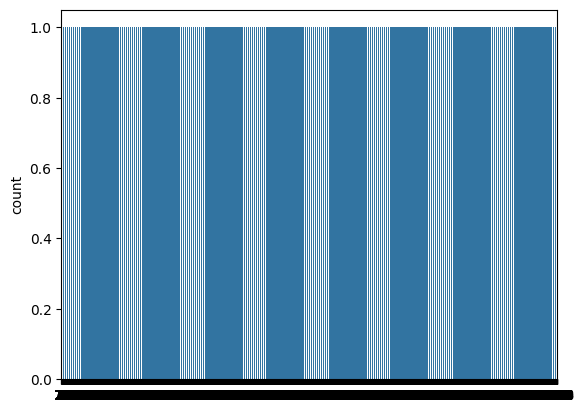

In [15]:
sns.countplot(dfbaru['Churn'])
plt.show()

In [16]:
dfbaru.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [17]:
#mendefinisikan feature matrix X dan Y

X = dfbaru.loc[:, dfbaru.columns !='Churn']
y = dfbaru['Churn']

In [18]:
#spliting dataset 70% data train dan 30% data test

from sklearn.model_selection import train_test_split as split

X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=42)

# **Model Random Forest**

In [19]:
from sklearn.ensemble import RandomForestClassifier as RF
rf_model = RF()
rf_model = rf_model.fit(X_train, y_train)
hasil_rf = rf_model.predict(X_test)

Laporan Klasifikasi Model Random Forest 

               precision    recall  f1-score   support

           0       1.00      0.96      0.98       883
           1       0.96      1.00      0.98       827

    accuracy                           0.98      1710
   macro avg       0.98      0.98      0.98      1710
weighted avg       0.98      0.98      0.98      1710



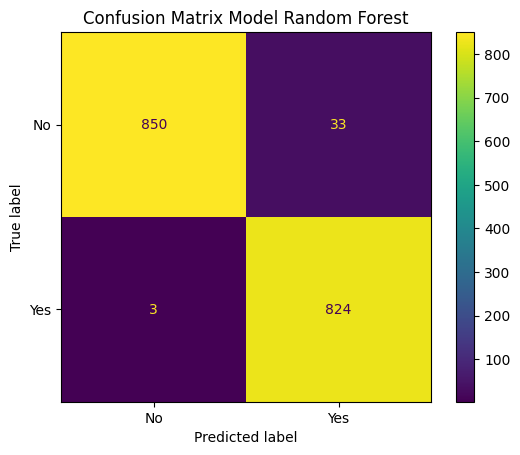

In [20]:
#Evaluasi model Random Forest
from sklearn.metrics import classification_report, confusion_matrix # Import the confusion_matrix function
from sklearn.metrics import ConfusionMatrixDisplay # Import the ConfusionMatrixDisplay class

print('Laporan Klasifikasi Model Random Forest \n\n', classification_report(y_test, hasil_rf))

# Create the confusion matrix
cm = confusion_matrix(y_test, hasil_rf)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot()

plt.title('Confusion Matrix Model Random Forest')
plt.show()

# **Final Model**

Feature Selection

Menggunakan fungsi Feature Importance untuk mengetahui kolom mana saja yang paling penting untuk digunakan pada modeling. Feature Importance menghasilkan skor untuk setiap fitur pada dataset, semakin tinggi skor semakin penting fitur tersebut

In [21]:
df_feature_importance = pd.DataFrame(rf_model.feature_importances_, index = X_train.columns,
                                     columns = ['Fitur yang Penting']).sort_values('Fitur yang Penting',ascending = False)
df_feature_importance

Fitur yang Penting
CustServCalls              0.183063
DayMins                    0.178157
MonthlyCharge              0.148742
ContractRenewal            0.110076
OverageFee                 0.086550
RoamMins                   0.073822
DataUsage                  0.064363
AccountWeeks               0.062963
DayCalls                   0.062621
DataPlan                   0.029642

Dapat dilihat 'DataPlan' adalah fitur yang paling tidak mempengaruhi model karena menempati urutan paling bawah. Dengan ini apakah dengan menghapus fitur tersebut dapat meningkat performa dari model.

In [22]:
#mendefinisikan feature matrix X dan Y dengan menghapus fitur DataPlan

X_train=X_train.drop('DataPlan', axis=1)
y_train=y_train
X_test=X_test.drop('DataPlan', axis=1)
y_test=y_test

# **Hyperparameter Tuning**

Mengimplementasikan hyperparameter tuning pada model Random Forest

In [56]:
# prompt: Mengimplementasikan hyperparameter tuning pada model Random Forest dan save model  , dan lakukan evaluasi model

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=RF(random_state=42),  # Use the same random state
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,  # Use the same random state
    n_jobs=-1  # Use all available CPU cores
)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Get the best model
best_rf_model = random_search.best_estimator_

# Evaluate the best model
hasil_rf_best = best_rf_model.predict(X_test)
print('Laporan Klasifikasi Model Random Forest Terbaik\n\n', classification_report(y_test, hasil_rf_best))

# Confusion Matrix for the best model
cm_best = confusion_matrix(y_test, hasil_rf_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=['No', 'Yes'])
disp_best.plot()
plt.title('Confusion Matrix Model Random Forest Terbaik')
plt.show()

# Save the best model
import joblib
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Laporan Klasifikasi Model Random Forest Terbaik

               precision    recall  f1-score   support

           0       1.00      0.96      0.98       883
           1       0.96      1.00      0.98       827

    accuracy                           0.98      1710
   macro avg       0.98      0.98      0.98      1710
weighted avg       0.98      0.98      0.98      1710



['best_random_forest_model.pkl']

# **Model Support Vector Machine**

In [30]:
#Model Support Vector Machine

from sklearn.svm import SVC
svc_model = SVC()
svc_model = svc_model.fit(X_train, y_train)
hasil_svc = svc_model.predict(X_test)

In [31]:
#Evaluasi model Support Vector Machine

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # Import ConfusionMatrixDisplay

print('Laporan Klasifikasi Model Support Vector Machine \n\n', classification_report(y_test, hasil_svc))

# Create the confusion matrix
cm = confusion_matrix(y_test, hasil_svc)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot()

plt.title('Confusion Matrix Model Support Vector Machine')


Laporan Klasifikasi Model Support Vector Machine 

               precision    recall  f1-score   support

           0       0.63      0.89      0.74       883
           1       0.79      0.45      0.57       827

    accuracy                           0.67      1710
   macro avg       0.71      0.67      0.65      1710
weighted avg       0.71      0.67      0.66      1710



Text(0.5, 1.0, 'Confusion Matrix Model Support Vector Machine')

Mengimplementasikan hyperparameter tuning pada Model Support Vector Machine

In [33]:
# Hyperparameter Tuning for SVM
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [34]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.508 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.508 total time=   0.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.508 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.508 total time=   0.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.508 total time=   0.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.508 total time=   0.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.506 total time=   0.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.506 total time=   1.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.600 total time=   1.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [35]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [36]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


SVC(C=1, gamma=1)


In [37]:
grid_predictions = grid.predict(X_test)

In [38]:
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       883
           1       1.00      0.99      1.00       827

    accuracy                           1.00      1710
   macro avg       1.00      1.00      1.00      1710
weighted avg       1.00      1.00      1.00      1710



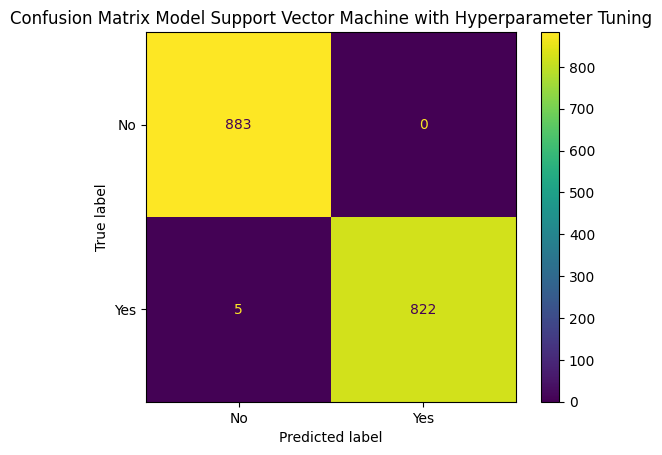

In [39]:
# Create the confusion matrix
cm = confusion_matrix(y_test, grid_predictions)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot()

plt.title('Confusion Matrix Model Support Vector Machine with Hyperparameter Tuning')
plt.show()

In [40]:
# prompt: menyimpan model svm yang sudah di hypertuning terbaik

# Simpan model SVM yang sudah di-hyperparameter tuning
joblib.dump(grid, 'svm_model_hyperparameter_tuned.pkl')

['svm_model_hyperparameter_tuned.pkl']

# **Model K-Nearest Neighbour**

In [41]:
#Model K-Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier as knn
knn_model = knn()
knn_model = knn_model.fit(X_train, y_train)
hasil_knn = knn_model.predict(X_test)

Laporan Klasifikasi Model K-Nearest Neighbour 

               precision    recall  f1-score   support

           0       0.87      0.69      0.77       883
           1       0.73      0.89      0.80       827

    accuracy                           0.79      1710
   macro avg       0.80      0.79      0.79      1710
weighted avg       0.80      0.79      0.79      1710



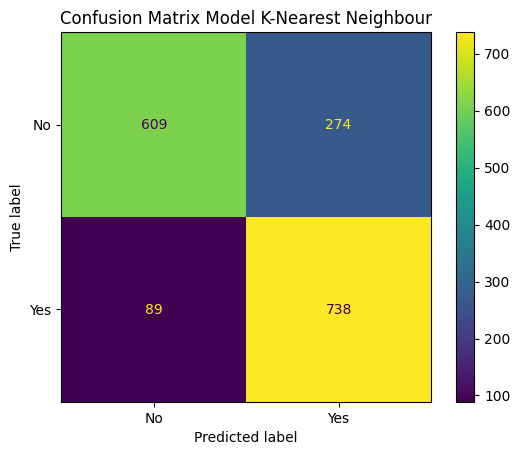

In [42]:
#Evaluasi model K-Nearest Neighbour

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix # Import ConfusionMatrixDisplay and confusion_matrix

print('Laporan Klasifikasi Model K-Nearest Neighbour \n\n', classification_report(y_test, hasil_knn))

# Create the confusion matrix
cm = confusion_matrix(y_test, hasil_knn)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot()


plt.title('Confusion Matrix Model K-Nearest Neighbour')
plt.xticks([0,1],['No','Yes'])
plt.yticks([0,1],['No','Yes'])
plt.show()

Mengimplementasikan hyperparameter tuning pada Model K-Nearest Neighbour

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.830 total time=   0.1s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.832 total time=   0.1s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.828 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.818 total time=   0.1s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.823 total time=   0.1s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.866 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.870 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.862 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.850 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.856 to

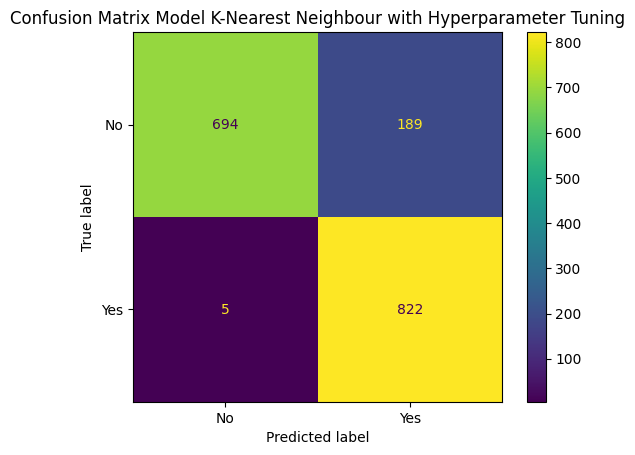

['knn_model_hyperparameter_tuned.pkl']

In [43]:
# prompt:  Mengimplementasikan hyperparameter tuning pada Model K-Nearest Neighbour

# Hyperparameter Tuning for KNN
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

grid_knn = GridSearchCV(knn(), param_grid, refit=True, verbose=3)
grid_knn.fit(X_train, y_train)

# print best parameter after tuning
print(grid_knn.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_knn.best_estimator_)

grid_predictions_knn = grid_knn.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_knn))

# Create the confusion matrix
cm = confusion_matrix(y_test, grid_predictions_knn)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot()

plt.title('Confusion Matrix Model K-Nearest Neighbour with Hyperparameter Tuning')
plt.show()

# Simpan model KNN yang sudah di-hyperparameter tuning
joblib.dump(grid_knn, 'knn_model_hyperparameter_tuned.pkl')

# **Melakukan prediksi pada data acak dengan menggunakan model terbaik**

In [62]:
import joblib
import numpy as np

# Load the saved models
rf_model = joblib.load('best_random_forest_model.pkl')
svm_model = joblib.load('svm_model_hyperparameter_tuned.pkl')
knn_model = joblib.load('knn_model_hyperparameter_tuned.pkl')

# Example data for prediction (replace with your actual data)
# Sample data
data_samples = [
    [100, 1, 10, 2, 100, 100, 75, 10, 5],  # Sample 1
    [200, 0, 2, 1, 150, 10, 50, 5, 3],     # Sample 2
    [10, 0, 5, 3, 25, 50, 80, 20, 10],     # Sample 3
    [50, 1, 15, 2, 120, 90, 60, 15, 8],    # Sample 4
    [300, 0, 5, 2, 180, 20, 70, 8, 6],     # Sample 5
    [15, 1, 8, 1, 40, 60, 90, 25, 12],     # Sample 6
    [80, 0, 3, 4, 60, 30, 40, 10, 7],      # Sample 7
    [180, 1, 12, 3, 250, 80, 100, 30, 20], # Sample 8
    [95, 0, 6, 2, 85, 45, 55, 12, 9],      # Sample 9
    [220, 1, 4, 1, 190, 70, 65, 18, 10]    # Sample 10
]

models = {
    "Random Forest": rf_model,
    "SVM": svm_model,
    "K-NN": knn_model
}

for model_name, model in models.items():
    print(f"Predictions using {model_name} model:")
    for data in data_samples:
        prediction = model.predict([data])
        print(f"Input Data: {data}, Prediction: {prediction[0]}")
    print("\n")


Predictions using Random Forest model:
Input Data: [100, 1, 10, 2, 100, 100, 75, 10, 5], Prediction: 0
Input Data: [200, 0, 2, 1, 150, 10, 50, 5, 3], Prediction: 0
Input Data: [10, 0, 5, 3, 25, 50, 80, 20, 10], Prediction: 0
Input Data: [50, 1, 15, 2, 120, 90, 60, 15, 8], Prediction: 0
Input Data: [300, 0, 5, 2, 180, 20, 70, 8, 6], Prediction: 0
Input Data: [15, 1, 8, 1, 40, 60, 90, 25, 12], Prediction: 0
Input Data: [80, 0, 3, 4, 60, 30, 40, 10, 7], Prediction: 1
Input Data: [180, 1, 12, 3, 250, 80, 100, 30, 20], Prediction: 0
Input Data: [95, 0, 6, 2, 85, 45, 55, 12, 9], Prediction: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local

Input Data: [220, 1, 4, 1, 190, 70, 65, 18, 10], Prediction: 0


Predictions using SVM model:
Input Data: [100, 1, 10, 2, 100, 100, 75, 10, 5], Prediction: 0
Input Data: [200, 0, 2, 1, 150, 10, 50, 5, 3], Prediction: 0
Input Data: [10, 0, 5, 3, 25, 50, 80, 20, 10], Prediction: 0
Input Data: [50, 1, 15, 2, 120, 90, 60, 15, 8], Prediction: 0
Input Data: [300, 0, 5, 2, 180, 20, 70, 8, 6], Prediction: 0
Input Data: [15, 1, 8, 1, 40, 60, 90, 25, 12], Prediction: 0
Input Data: [80, 0, 3, 4, 60, 30, 40, 10, 7], Prediction: 0
Input Data: [180, 1, 12, 3, 250, 80, 100, 30, 20], Prediction: 0
Input Data: [95, 0, 6, 2, 85, 45, 55, 12, 9], Prediction: 0
Input Data: [220, 1, 4, 1, 190, 70, 65, 18, 10], Prediction: 0


Predictions using K-NN model:
Input Data: [100, 1, 10, 2, 100, 100, 75, 10, 5], Prediction: 1
Input Data: [200, 0, 2, 1, 150, 10, 50, 5, 3], Prediction: 0
Input Data: [10, 0, 5, 3, 25, 50, 80, 20, 10], Prediction: 0
Input Data: [50, 1, 15, 2, 120, 90, 60, 15, 8], Prediction: 0
Input Da

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have va